# Homework #1 Data Exploration (Kumar Gaureve Varun - 91131)

# Question 1


## a. Read the data in R using
Determine whether each of the attributes (columns) are treated as qualitative (categorical) or quantitative (numeric) using R. Explain how you can tell using R.


Reading using read.csv function

In [16]:
myData<-read.csv("HW01pb1data.csv", header=FALSE)

let's see the initial profile of the data read above

In [3]:
summary(myData)

       V1               V2               V3               V4            V5     
 Min.   :  0.00   Min.   :  0.00   Min.   :  0.00   0      :223   10     :253  
 1st Qu.:  0.00   1st Qu.:  0.00   1st Qu.:  5.00   10     :211   0      :200  
 Median : 10.00   Median : 10.00   Median : 10.00   5      :148   5      :149  
 Mean   : 12.38   Mean   : 11.62   Mean   : 11.61   20     : 82   20     : 78  
 3rd Qu.: 10.00   3rd Qu.: 10.00   3rd Qu.: 10.00   15     : 37   15     : 35  
 Max.   :270.00   Max.   :130.00   Max.   :180.00   30     : 30   30     : 22  
                                                    (Other): 69   (Other): 63  

Next, let's find out what datatypes did read.csv associated with each column

In [14]:
sapply(myData, class)

V1        V2        V3        V4        V5 
"integer" "integer" "integer"  "factor"  "factor"

Another way is shown below. It gives a bit more information along with data types.

In [15]:
str(myData)

'data.frame':	800 obs. of  5 variables:
 $ V1: int  0 10 30 0 20 10 10 50 0 30 ...
 $ V2: int  0 0 0 10 50 0 0 10 10 20 ...
 $ V3: int  0 10 40 10 10 100 0 10 0 10 ...
 $ V4: Factor w/ 25 levels "0","10","100",..: 2 1 17 2 10 1 2 2 13 10 ...
 $ V5: Factor w/ 19 levels "0","10","120",..: 1 2 6 6 11 2 2 6 2 11 ...


### R determined columns 1 through 3 as quantitative (integer) type and columns 4 & 5 as qualitative or Factor

## b. What is the specific problem that causes two of these attributes to be read in as qualitative (categorical) when it seems it should be quantitative (numeric)?

It is easier to find the underlying problem by using other advanced R packages such as tidyr, readr etc

Loading library...

In [24]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [25]:
myNData<-read_csv("HW01pb1data.csv", col_names=FALSE)

Parsed with column specification:
cols(
  X1 = col_integer(),
  X2 = col_integer(),
  X3 = col_integer(),
  X4 = col_integer(),
  X5 = col_integer()
)
Warning message:
“2 parsing failures.
row col   expected      actual
405  X4 an integer thirty five
531  X5 an integer twenty five
”

Above, read_csv's behavior is very different from native read.csv. Columns's 4 and 5 are determined to be integer while warning the user about deviations from that classification in those columns. The problem rows in columns 4 and 5 are 405 and 531

In [40]:
problems(myNData)

row,col,expected,actual
405,X4,an integer,thirty five
531,X5,an integer,twenty five


As seen above, rows 405 and 531 have incosistent type of data in columns X4 and X5 respectively.

## c. Use the command plot() in R to make a plot for column 1 by entering plot(myData[,1]).  Use a similar command to plot column 4

Because one variable is read in as quantitative (numeric) and the other as qualitative (categorical) these two plots are showing completely different things by default. Explain exactly what is being plotted in each case. Include these plots in your homewor

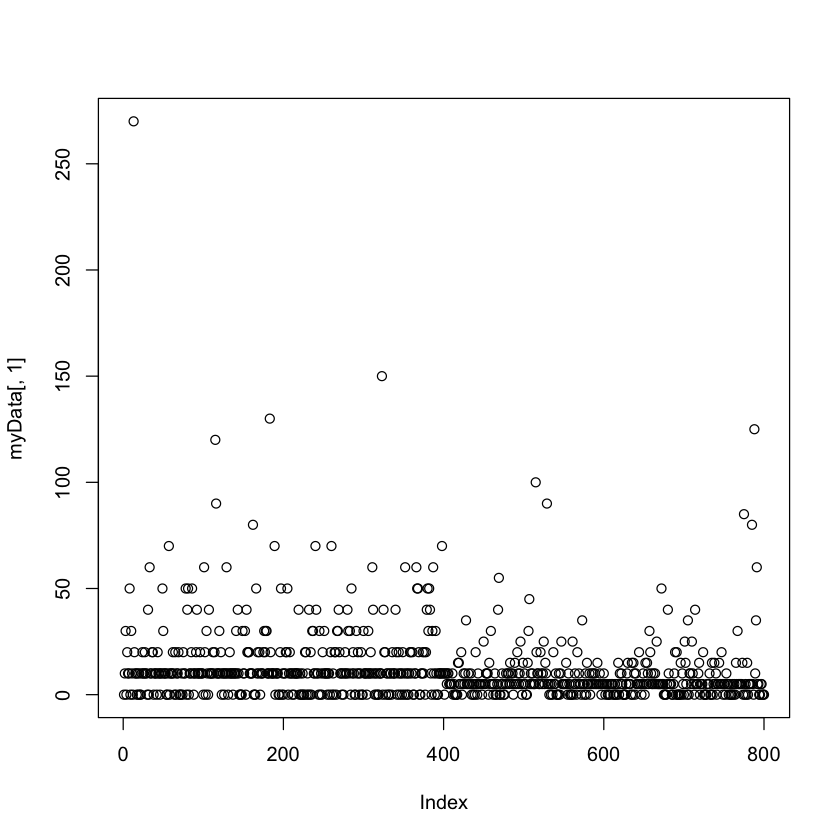

In [36]:
plot(myData[,1])

Column 1 was read as integer, therefore plot command shows a scatter plot of the data. It is showing each data point from row 1 to row 800, and its corresponding integer value on the Y axis.

Column 4 was read as factor or qualitative therefore it is expected that it will be plotted as a bar chart of the count of unique entries in that column.

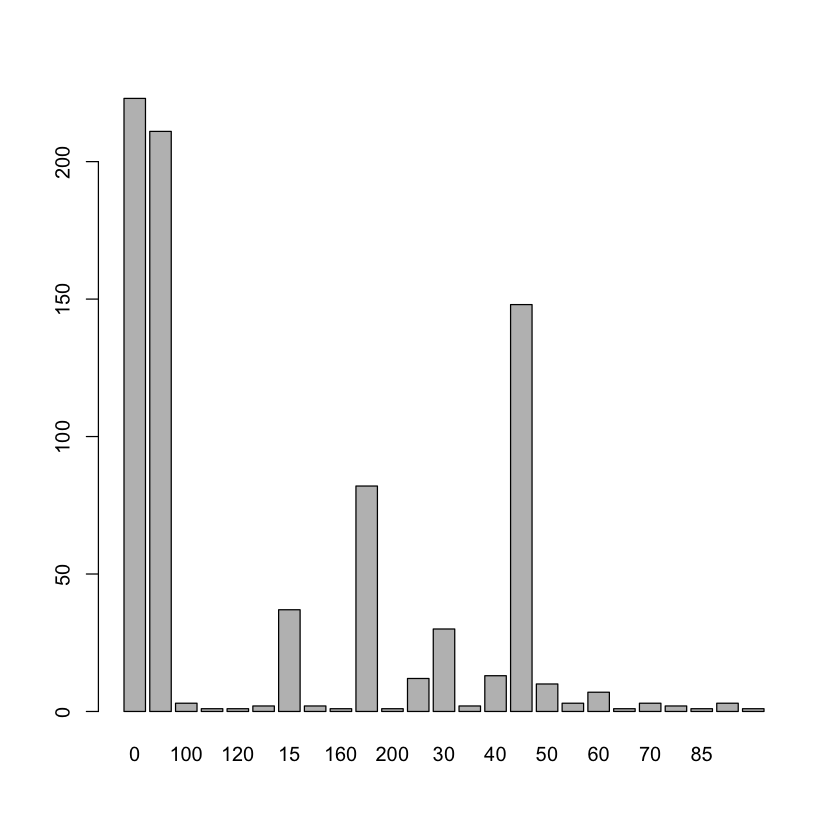

In [29]:
plot(myData[,4])

## d. (optional) Read the data into Excel. Excel should have no problem opening the file directly since it is .csv. Create a new column that is equal to the forth column plus 10. What is the result for the problem observations (rows) you identified in part b? What specific outcome does Excel display?

Excel shows the error "#VALUE!" for the newly created column in rows 405 and 531.

<img src="SW1.PNG">

# Question 2

## a) Read the data into R using myData<-read.csv("HW01pb2data.csv",header=FALSE). Note, you first need to specify your working directory using the setwd() command. Extract a simple random sample with replacement of 10,000 observations (rows). (Hint:  R has a function called sample)  Show your R commands for doing this.

In [41]:
my2Data <-read.csv("HW01pb2data.csv", header=FALSE)

In [74]:
summary(my2Data)

       V1         
 Min.   :-0.1115  
 1st Qu.: 8.1039  
 Median : 9.4530  
 Mean   : 9.4515  
 3rd Qu.:10.8012  
 Max.   :18.9666  

In [61]:
sample_data = my2Data[sample(1:nrow(my2Data), size= 10000, replace=TRUE),]

## b) For your sample, use the functions mean(), max(), var() and quantile(,.25) to compute the mean, maximum, variance and 1st quartile respectively. Show your R code and the resulting values.

In [92]:
mean_sample = mean(sample_data)
paste (mean_sample)

[1] "9.46896648161094"

In [93]:
max_sample = max(sample_data)
paste(max_sample)

[1] "16.9173637239309"

In [94]:
var_sample = var(sample_data)
paste(var_sample)

[1] "4.01427276687162"

In [95]:
oneq_sample = quantile(sample_data,.25)
paste(oneq_sample)

[1] "8.12890253430812"

## c) Compute the same quantities in part b on the entire data set and show your answers. How much do they differ from your answers in part b?

In [96]:
mean_ds = mean(my2Data[,1])
max_ds = max(my2Data[,1])
var_ds = var(my2Data[,1])
oneq_ds = quantile(my2Data[,1], 0.25)


In [104]:
paste("Mean of the dataset: ", mean_ds, " Difference from Sample: ", mean_ds - mean_sample)
paste("Max of the dataset: ", max_ds, " Difference from sample: ", max_ds - max_sample)
paste("Variance of the dataset: ", var_ds, "Differece from sample ", var_ds - var_sample)
paste("25% quantile of the dataset: ", oneq_ds, " Difference from sample ", oneq_ds - oneq_sample)

[1] "Mean of the dataset:  9.4514680349268  Difference from Sample:  -0.0174984466841455"

[1] "Max of the dataset:  18.9665681608958  Difference from sample:  2.0492044369649"

[1] "Variance of the dataset:  4.00182160383524 Differece from sample  -0.0124511630363813"

[1] "25% quantile of the dataset:  8.10388024879266  Difference from sample  -0.0250222855154636"

## d) (Optional Part) Save your sample from R to a csv file using the command write.csv(). Then open this file with Excel and compute the mean, maximum, variance and 1st quartile. Provide the values and name the Excel functions you used to compute these.

In [107]:
write.csv(sample_data, "hw01q2d.csv")

<img SRC="SW2.PNG">

## e) (Optional Part) Exactly what happens if you try to open the full data set with Excel?

* Excel gives error message that now all data read completely
* Only 1048576 rows are read

# Question 3
This question uses a sample of 2000 Ocean View house prices in the file HW01pb3OceanViewdata.csv and a sample of 5000 Desert house prices in the file HW01pb3Desertdata.csv. Download both data sets to your computer. Note that the house prices are in thousands of dollars.  (Hint: look at the file MyFirstRLesson.r)


## a) Use R to produce a single graph displaying a box plot for each set. Include the R commands and the plot. Put a name in the title of the plot (for example, main="House Box Plots").  Explain the box plot.

In [210]:
ov_data <- read_csv("HW01pb3OceanViewdata.csv", col_names  = FALSE)
des_data <- read_csv("HW01pb3Desertdata.csv", col_names    = FALSE)

Parsed with column specification:
cols(
  X1 = col_integer()
)
Parsed with column specification:
cols(
  X1 = col_integer()
)


In [220]:
ov_data["Type"] <- "Ocean"
des_data["Type"] <- "Desert"

In [234]:
total_data <- rbind(ov_data, des_data)

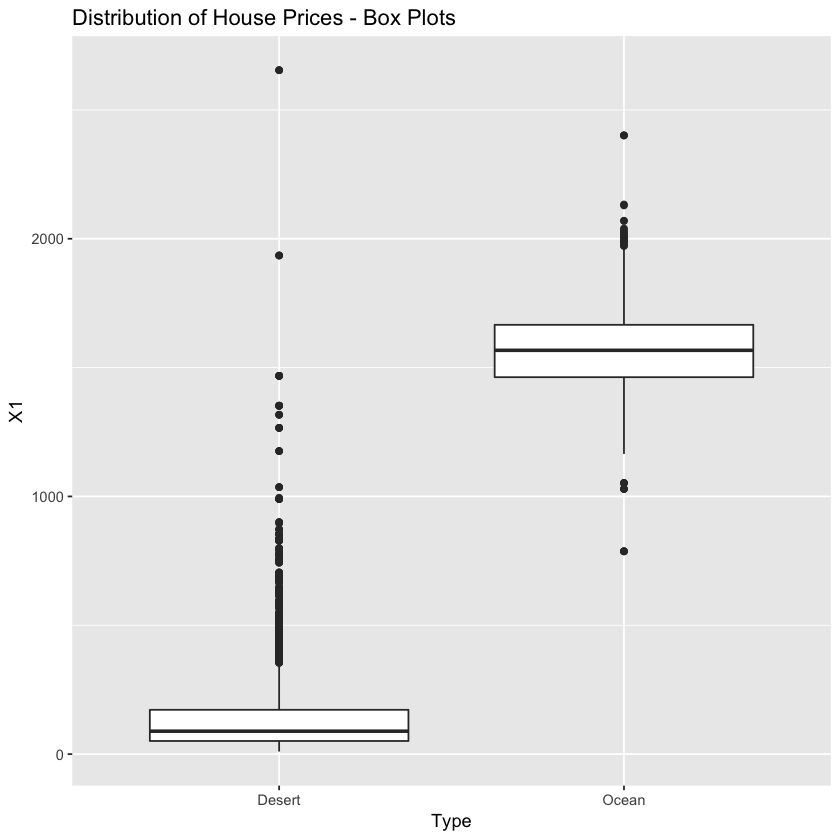

In [239]:
ggplot(total_data, aes(x = Type, y = X1)) + 
geom_boxplot() + 
ggtitle("Distribution of House Prices - Box Plots")b


Discussion: As seen above there is a vast differece in the median prices for two types of houses. Desert houses' median price is 89,000 while that of Ocean View Houses is 1,567,000. There is one outlier in the desert house which has a price tag of 2,654,000 which is more than the highest Ocean View House costing 2,401,000. The range is much wider for desert houses than for ocean view houses.

Sorry, I had to remove the dollar symbol from house prices due to a markdown issue with this notebook

## b) Use R to produce a frequency histogram for only the Ocean View house prices. Use intervals of width $250,000 beginning at 0 and ending at \$3 million. Include the R commands and the plot. Create an appropriate title for the plot. (Hint: Use the hist R command)

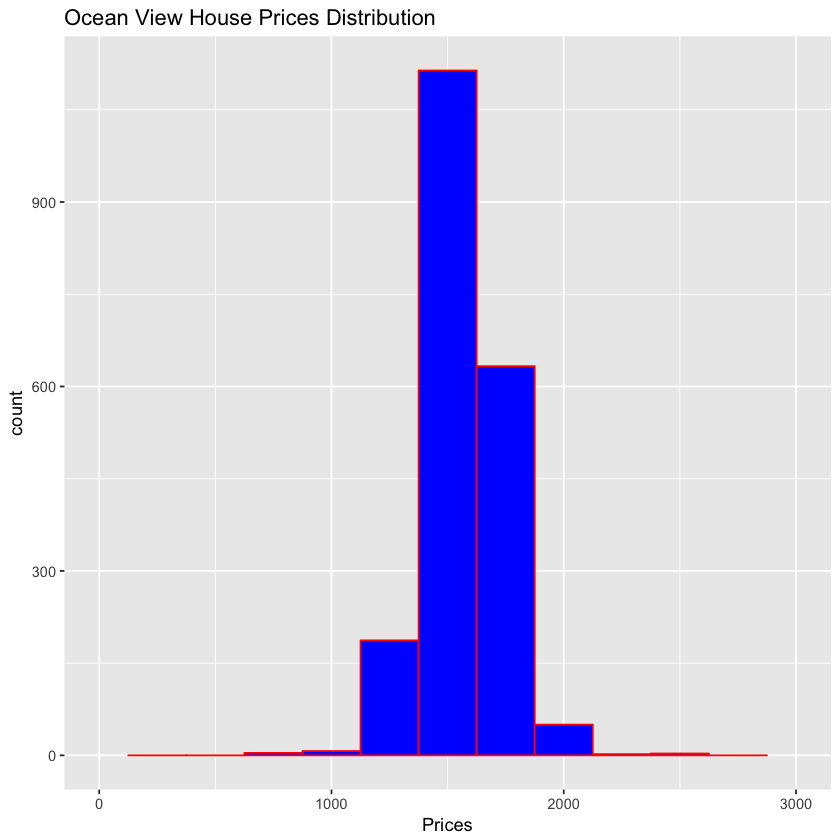

In [253]:
qplot(ov_data$X1,
      geom="histogram",
      binwidth = 250,
      fill= I("blue"),
      col= I("red"),
      main = "Ocean View House Prices Distribution",
      xlab = "Prices",
      xlim = c(0, 3000))

## c) The empirical cumulative distribution function is described in the web site: http://en.wikipedia.org/wiki/ECDF  Use R to plot the ECDF of the Ocean View houses.  Make another ECDF plot of the Desert houses. Place both plots on the same page.    Include legends. Include the R commands and the plot. Create a title for each plot.

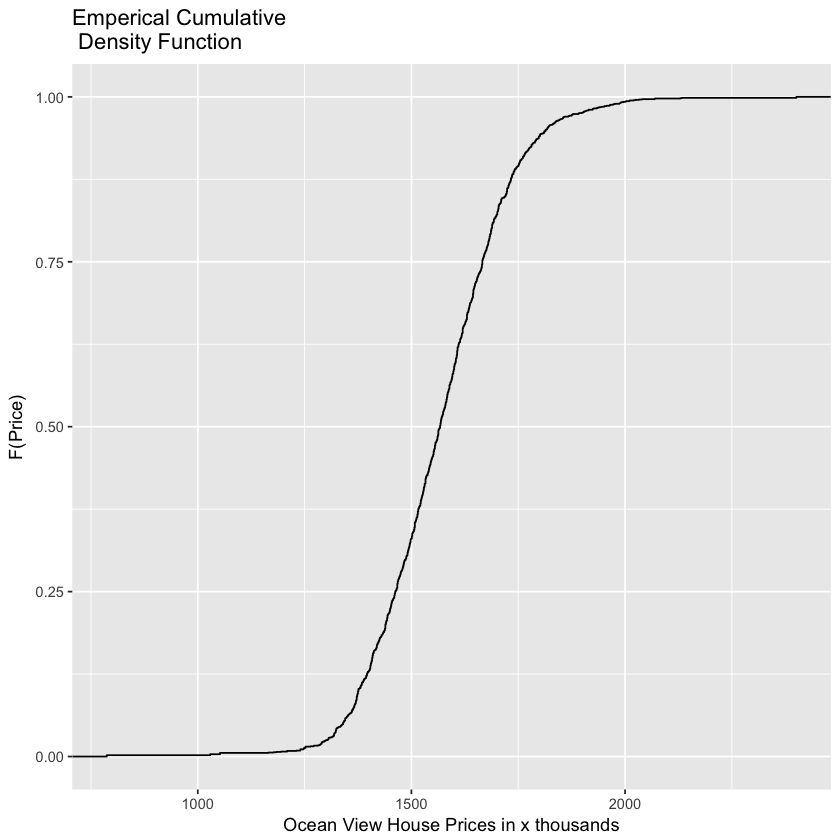

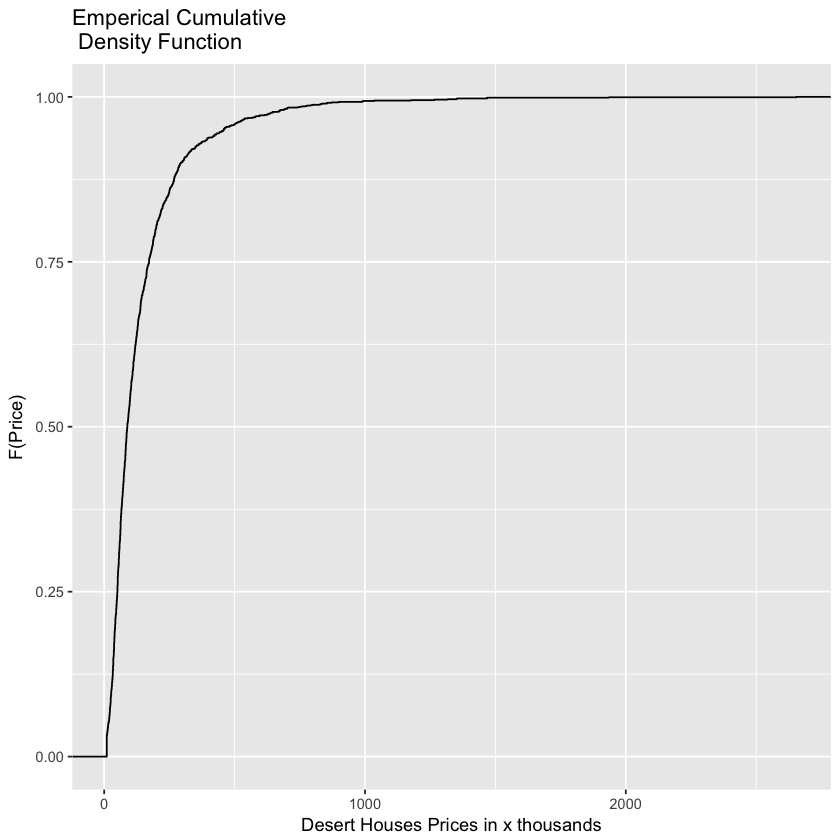

In [261]:
ggplot(ov_data, aes(X1)) + 
stat_ecdf(geom = "step") + 
labs (title = "Emperical Cumulative \n Density Function", y = "F(Price)", x = "Ocean View House Prices in x thousands")

ggplot(des_data, aes(X1)) + 
stat_ecdf(geom = "step")+ 
labs (title = "Emperical Cumulative \n Density Function", y = "F(Price)", x = "Desert Houses Prices in x thousands")


# Question 4 
This question uses the Orange data set which is included in the R download.  Type in the r command: orange <- as.data.frame(Orange). The data frame, orange,  consists of three columns:  Tree, age, and circumference.

## a) Use plot() in R to make a scatter plot for this data with age on the x-axis and circumference on the y-axis. What range should be given for the x-axis?  What about the y-axis range?  Create an appropriate title for the plot.  Include the R commands and the plot.

In [263]:
library(datasets)
orange <- as.data.frame(Orange)

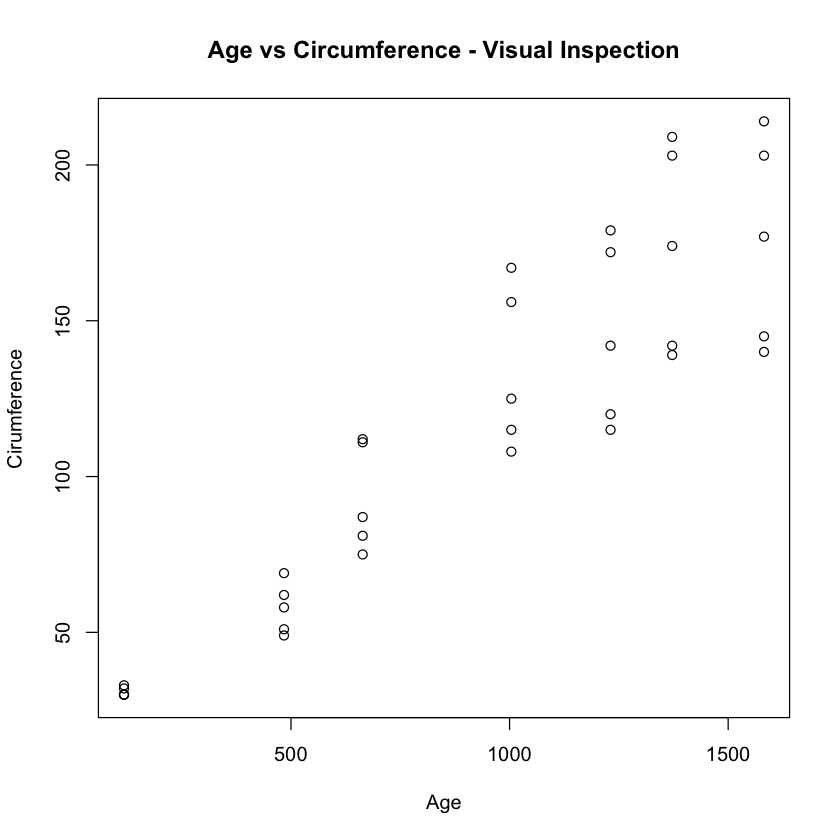

In [267]:
plot(orange$age, orange$circumference, main= "Age vs Circumference - Visual Inspection", xlab= "Age", ylab= "Cirumference")

In [269]:
# using ggplot
# ggplot(orange, aes(x = age, y = circumference)) +  geom_point(shape=1)

## b) Compute the correlation between the age and circumference of the first tree in R using the function cor().

In [273]:
head(orange)

Tree,age,circumference
1,118,30
1,484,58
1,664,87
1,1004,115
1,1231,120
1,1372,142


In [276]:
one_tree = filter(orange, Tree == 1)

### Correlation between age and circumference for tree 1

In [278]:
cor(one_tree$age, one_tree$circumference)

[1] 0.9854675

Age and circumference for tree 1 are highly positivly correlated.

## c) For this problem you may want to use some the following R functions: names, merge, cov, and cor.  Create a covariance - correlation chart which has the covariance and correlation of the age and circumference for each tree.  Have your code print out the following chart with the same titles and the values filled in

In [348]:
orange %>%
        group_by(Tree) %>%
        summarise( Correlation = cor(age, circumference), Covariance = cov(age, circumference))

Tree,Correlation,Covariance
3,0.9881766,22239.83
1,0.9854675,22340.07
5,0.9877376,30442.81
2,0.9873624,34290.45
4,0.9844610,37062.62


# Question 5
This question uses the sample of 5,000 Desert Houses from problem three.

## a) What is the median value? Is it larger or smaller than the mean?

In [350]:

summary(des_data)

       X1           Type          
 Min.   :  10   Length:5000       
 1st Qu.:  51   Class :character  
 Median :  89   Mode  :character  
 Mean   : 144                     
 3rd Qu.: 172                     
 Max.   :2654                     

### The median value is is 89,000 and the mean is 144,000, which is higher than the median value.

## b) What does your answer to part a) suggest about the shape of the distribution (right-skewed or left-skewed)? Does the distribution have more weight at one end?  Is there a longer tail at the other?  The distribution is skewed to the right if there is a long tail to the right.  That is if the mean is greater than the median, the distribution is skewed to the right.  A few high numbers will pull the mean above the median.

### It implies that the distribution is right-skewed with more weight at the lower end of the price range and there is a longer tail towards the right. The histogram of Desert Houses Prices below shows the distribution.

Warning message:
“Removed 1 rows containing missing values (geom_bar).”

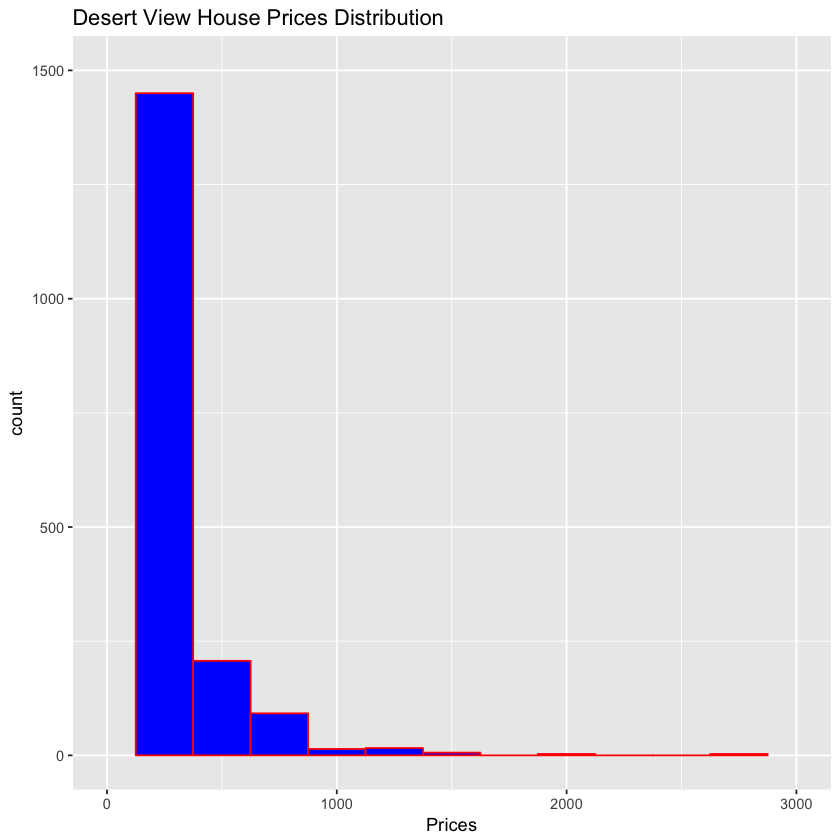

In [355]:
qplot(des_data$X1,
      geom="histogram",
      binwidth = 250,
      fill= I("blue"),
      col= I("red"),
      main = "Desert View House Prices Distribution",
      xlab = "Prices",
      xlim = c(0, 3000),
     ylim = c (0, 1500))

## c) How does the median change if you add 10 (thousand dollars) to all the values?

In [ ]:
new_des_data = dplyr::mutate(des_data, addten = X1 + 10)

In [360]:
summary(new_des_data)
summary(des_data)

       X1           Type               addten    
 Min.   :  10   Length:5000        Min.   :  20  
 1st Qu.:  51   Class :character   1st Qu.:  61  
 Median :  89   Mode  :character   Median :  99  
 Mean   : 144                      Mean   : 154  
 3rd Qu.: 172                      3rd Qu.: 182  
 Max.   :2654                      Max.   :2664  

       X1           Type          
 Min.   :  10   Length:5000       
 1st Qu.:  51   Class :character  
 Median :  89   Mode  :character  
 Mean   : 144                     
 3rd Qu.: 172                     
 Max.   :2654                     

After adding 10 (thousand dollars) to the prices, the median is also moved up by the same amount.

## d) How does the median change if you multiply all the values by 2?

In [361]:
new_des_two = dplyr::mutate(des_data, mult2 = X1 * 2)

In [362]:
summary(new_des_two)

       X1           Type               mult2       
 Min.   :  10   Length:5000        Min.   :  20.0  
 1st Qu.:  51   Class :character   1st Qu.: 102.0  
 Median :  89   Mode  :character   Median : 178.0  
 Mean   : 144                      Mean   : 288.1  
 3rd Qu.: 172                      3rd Qu.: 344.0  
 Max.   :2654                      Max.   :5308.0  

Similarly, only multiplying the prices by 2 the median also becomes twice (178k)

#### End of homework 01